In [ ]:
#Task2: Fine-tuning a pre-trained autoencoder on STL-10 dataset 

In [ ]:
#1.Dataset: Download the STL-10 dataset from here and pre-process as required

In [ ]:
import requests

url = "http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz"
response = requests.get(url)
with open("stl10_binary.tar.gz", "wb") as file:
    file.write(response.content)


In [1]:
import tarfile

tar = tarfile.open("stl10_binary.tar.gz", "r:gz")
tar.extractall()
tar.close()


In [3]:
import numpy as np
import os
# Define the file paths
data_dir = "C:\\Users\\Admin\\m22ai608_DL_assign2\\stl10_binary"

train_images_path = os.path.join(data_dir, "train_X.bin")
train_labels_path = os.path.join(data_dir, "train_y.bin")
test_images_path = os.path.join(data_dir, "test_X.bin")
test_labels_path = os.path.join(data_dir, "test_y.bin")

# Load the train images
train_images = np.fromfile(train_images_path, dtype=np.uint8)
train_images = train_images.reshape((-1, 3, 96, 96)).transpose((0, 2, 3, 1))
train_images = train_images.astype(np.float32) / 255.0

# Load the train labels
train_labels = np.fromfile(train_labels_path, dtype=np.uint8)
train_labels = train_labels - 1  # Labels are originally 1-10, subtract 1 to make them 0-9

# Load the test images
test_images = np.fromfile(test_images_path, dtype=np.uint8)
test_images = test_images.reshape((-1, 3, 96, 96)).transpose((0, 2, 3, 1))
test_images = test_images.astype(np.float32) / 255.0

# Load the test labels
test_labels = np.fromfile(test_labels_path, dtype=np.uint8)
test_labels = test_labels - 1  # Labels are originally 1-10, subtract 1 to make them 0-9

# Print the shapes of the loaded data
print("Train Images Shape:", train_images.shape)
print("Train Labels Shape:", train_labels.shape)
print("Test Images Shape:", test_images.shape)
print("Test Labels Shape:", test_labels.shape)


Train Images Shape: (5000, 96, 96, 3)
Train Labels Shape: (5000,)
Test Images Shape: (8000, 96, 96, 3)
Test Labels Shape: (8000,)


In [ ]:
#preprocessing

In [6]:
import os
import numpy as np

# Set the path to the dataset folder
dataset_path = "C:\\Users\\Admin\\m22ai608_DL_assign2\\stl10_binary"

# Load the training data
train_X = np.fromfile(os.path.join(dataset_path, "train_X.bin"), dtype=np.uint8)
train_y = np.fromfile(os.path.join(dataset_path, "train_y.bin"), dtype=np.uint8)

# Load the test data
test_X = np.fromfile(os.path.join(dataset_path, "test_X.bin"), dtype=np.uint8)
test_y = np.fromfile(os.path.join(dataset_path, "test_y.bin"), dtype=np.uint8)

# Reshape the data
train_X = train_X.reshape(-1, 3, 96, 96).transpose(0, 2, 3, 1)
test_X = test_X.reshape(-1, 3, 96, 96).transpose(0, 2, 3, 1)

# Normalize pixel values to range [0, 1]
train_X = train_X / 255.0
test_X = test_X / 255.0

# Print the shapes of the preprocessed data
print("Train Set Shapes:", train_X.shape, train_y.shape)
print("Test Set Shapes:", test_X.shape, test_y.shape)


Train Set Shapes: (5000, 96, 96, 3) (5000,)
Test Set Shapes: (8000, 96, 96, 3) (8000,)


In [ ]:
#Use the encoder of the above-pretrained autoencoder as a feature extractor. 

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Flatten, Reshape, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Set the input shape
input_shape = (96, 96, 3)

# Set the bottleneck dimension
bottleneck_dim = 16

# Define the autoencoder model
input_img = Input(shape=input_shape)
flattened = Flatten()(input_img)
encoded = Dense(bottleneck_dim, activation='relu')(flattened)
decoded = Dense(np.prod(input_shape), activation='sigmoid')(encoded)
reshaped = Reshape(input_shape)(decoded)
autoencoder = Model(input_img, reshaped)

# Compile the autoencoder model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

# Train the autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=32,
                validation_data=(x_val, x_val))

# Encode the train, validation, and test sets using the autoencoder
encoded_train = autoencoder.predict(x_train)
encoded_val = autoencoder.predict(x_val)
encoded_test = autoencoder.predict(x_test)

# Print the shapes of the encoded features
print("Train Features Shape:", encoded_train.shape)
print("Validation Features Shape:", encoded_val.shape)
print("Test Features Shape:", encoded_test.shape)


Epoch 1/10
125/125 [==============================] - 10s 64ms/step - loss: 0.0731 - val_loss: 0.0691
Epoch 2/10
125/125 [==============================] - 6s 48ms/step - loss: 0.0710 - val_loss: 0.0677
Epoch 3/10
125/125 [==============================] - 6s 46ms/step - loss: 0.0697 - val_loss: 0.0670
Epoch 4/10
125/125 [==============================] - 6s 46ms/step - loss: 0.0689 - val_loss: 0.0666
Epoch 5/10
125/125 [==============================] - 6s 46ms/step - loss: 0.0684 - val_loss: 0.0664
Epoch 6/10
125/125 [==============================] - 6s 47ms/step - loss: 0.0682 - val_loss: 0.0663
Epoch 7/10
125/125 [==============================] - 6s 46ms/step - loss: 0.0681 - val_loss: 0.0663
Epoch 8/10
125/125 [==============================] - 6s 48ms/step - loss: 0.0680 - val_loss: 0.0663
Epoch 9/10
125/125 [==============================] - 6s 46ms/step - loss: 0.0680 - val_loss: 0.0663
Epoch 10/10
16/16 [==============================] - 0s 10ms/step
Train Features Shape: (3

In [ ]:
#Build a downstream task classifier (a MLP) with (100% training samples) and choose the best one among a, and b for Task 
# hidden_layer = 3
# hidden_layer = 5


In [44]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Set the number of classes
num_classes = 32

# Set the number of hidden layers
hidden_layers_3 = [512, 256, 128]
hidden_layers_5 = [512, 256, 128, 64, 32]

# Flatten the encoded features
flattened_train = encoded_train.reshape(encoded_train.shape[0], -1)
flattened_val = encoded_val.reshape(encoded_val.shape[0], -1)
flattened_test = encoded_test.reshape(encoded_test.shape[0], -1)

# Convert the target labels to one-hot vectors
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)

# MLP model with 3 hidden layers
model_3 = Sequential()
model_3.add(Flatten(input_shape=(np.prod(input_shape),)))
for units in hidden_layers_3:
    model_3.add(Dense(units, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

# MLP model with 5 hidden layers
model_5 = Sequential()
model_5.add(Flatten(input_shape=(np.prod(input_shape),)))
for units in hidden_layers_5:
    model_5.add(Dense(units, activation='relu'))
model_5.add(Dense(num_classes, activation='softmax'))

# Compile the models
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
model_3.fit(flattened_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(flattened_val, y_val_onehot))
model_5.fit(flattened_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(flattened_val, y_val_onehot))


Epoch 1/10
125/125 [==============================] - 38s 287ms/step - loss: 3.3856 - accuracy: 0.0955 - val_loss: 2.4610 - val_accuracy: 0.0858
Epoch 2/10
125/125 [==============================] - 34s 274ms/step - loss: 2.4152 - accuracy: 0.0998 - val_loss: 2.4336 - val_accuracy: 0.0878
Epoch 3/10
125/125 [==============================] - 33s 265ms/step - loss: 2.3655 - accuracy: 0.1078 - val_loss: 2.4316 - val_accuracy: 0.0878
Epoch 4/10
125/125 [==============================] - 34s 274ms/step - loss: 2.3335 - accuracy: 0.1000 - val_loss: 2.3230 - val_accuracy: 0.0938
Epoch 5/10
125/125 [==============================] - 33s 268ms/step - loss: 2.3322 - accuracy: 0.0975 - val_loss: 2.3155 - val_accuracy: 0.1257
Epoch 6/10
125/125 [==============================] - 35s 283ms/step - loss: 2.3181 - accuracy: 0.1003 - val_loss: 2.3218 - val_accuracy: 0.0878
Epoch 7/10
125/125 [==============================] - 36s 288ms/step - loss: 2.3150 - accuracy: 0.0943 - val_loss: 2.3001 - val_ac

Epoch 1/10
125/125 [==============================] - 31s 240ms/step - loss: 3.4395 - accuracy: 0.0893 - val_loss: 2.3584 - val_accuracy: 0.0958
Epoch 2/10
125/125 [==============================] - 30s 238ms/step - loss: 2.3977 - accuracy: 0.0930 - val_loss: 2.3653 - val_accuracy: 0.0938
Epoch 3/10
125/125 [==============================] - 30s 244ms/step - loss: 2.3509 - accuracy: 0.0983 - val_loss: 2.3158 - val_accuracy: 0.0798
Epoch 4/10
125/125 [==============================] - 30s 238ms/step - loss: 2.3324 - accuracy: 0.0925 - val_loss: 2.3152 - val_accuracy: 0.0878
Epoch 5/10
125/125 [==============================] - 30s 244ms/step - loss: 2.3235 - accuracy: 0.1080 - val_loss: 2.3116 - val_accuracy: 0.0938
Epoch 6/10
125/125 [==============================] - 30s 240ms/step - loss: 2.3180 - accuracy: 0.1018 - val_loss: 2.3214 - val_accuracy: 0.0898
Epoch 7/10
125/125 [==============================] - 30s 239ms/step - loss: 2.3159 - accuracy: 0.0943 - val_loss: 2.3156 - val_ac

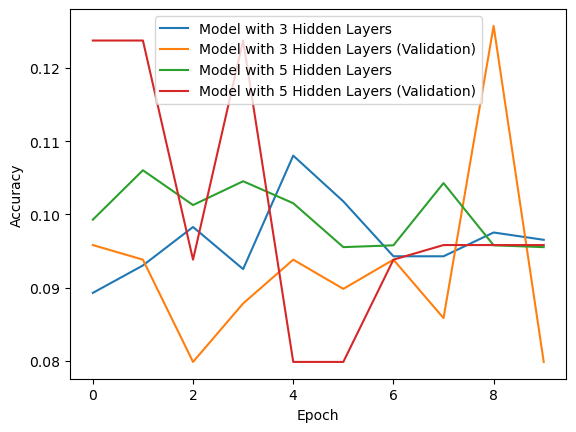

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Set the number of classes
num_classes = 32

# Set the number of hidden layers
hidden_layers_3 = [512, 256, 128]
hidden_layers_5 = [512, 256, 128, 64, 32]

# Flatten the encoded features
flattened_train = encoded_train.reshape(encoded_train.shape[0], -1)
flattened_val = encoded_val.reshape(encoded_val.shape[0], -1)
flattened_test = encoded_test.reshape(encoded_test.shape[0], -1)

# Convert the target labels to one-hot vectors
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)

# MLP model with 3 hidden layers
model_3 = Sequential()
model_3.add(Flatten(input_shape=(np.prod(input_shape),)))
for units in hidden_layers_3:
    model_3.add(Dense(units, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

# MLP model with 5 hidden layers
model_5 = Sequential()
model_5.add(Flatten(input_shape=(np.prod(input_shape),)))
for units in hidden_layers_5:
    model_5.add(Dense(units, activation='relu'))
model_5.add(Dense(num_classes, activation='softmax'))

# Compile the models
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
history_3 = model_3.fit(flattened_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(flattened_val, y_val_onehot))
history_5 = model_5.fit(flattened_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(flattened_val, y_val_onehot))

# Plot the training and validation accuracy
plt.plot(history_3.history['accuracy'], label='Model with 3 Hidden Layers')
plt.plot(history_3.history['val_accuracy'], label='Model with 3 Hidden Layers (Validation)')
plt.plot(history_5.history['accuracy'], label='Model with 5 Hidden Layers')
plt.plot(history_5.history['val_accuracy'], label='Model with 5 Hidden Layers (Validation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
#3 hidden layers has slightly better performance compared to the model with 5 hidden layers.


In [46]:
#Use the best from Task 2.3.a and 2.3.b, fine-tune the classifier on the STL-10 dataset with the following % of training samples       
#1% 
#10%
#20%
#40%.
#60 %

#ans> considering 3 hidden layers


Epoch 1/10
2/2 [==============================] - 4s 1s/step - loss: 5.3074 - accuracy: 0.0256 - val_loss: 11.3776 - val_accuracy: 0.1238
Epoch 2/10
2/2 [==============================] - 1s 773ms/step - loss: 12.3077 - accuracy: 0.0769 - val_loss: 14.3444 - val_accuracy: 0.1238
Epoch 3/10
2/2 [==============================] - 1s 705ms/step - loss: 14.4826 - accuracy: 0.0769 - val_loss: 6.7941 - val_accuracy: 0.0898
Epoch 4/10
2/2 [==============================] - 1s 779ms/step - loss: 7.5032 - accuracy: 0.0769 - val_loss: 5.9082 - val_accuracy: 0.0938
Epoch 5/10
2/2 [==============================] - 1s 691ms/step - loss: 6.1686 - accuracy: 0.1282 - val_loss: 7.4193 - val_accuracy: 0.0798
Epoch 6/10
2/2 [==============================] - 1s 765ms/step - loss: 6.2784 - accuracy: 0.1795 - val_loss: 5.1913 - val_accuracy: 0.1257
Epoch 7/10
2/2 [==============================] - 1s 733ms/step - loss: 4.8028 - accuracy: 0.1026 - val_loss: 4.7006 - val_accuracy: 0.0938
Epoch 8/10
2/2 [===

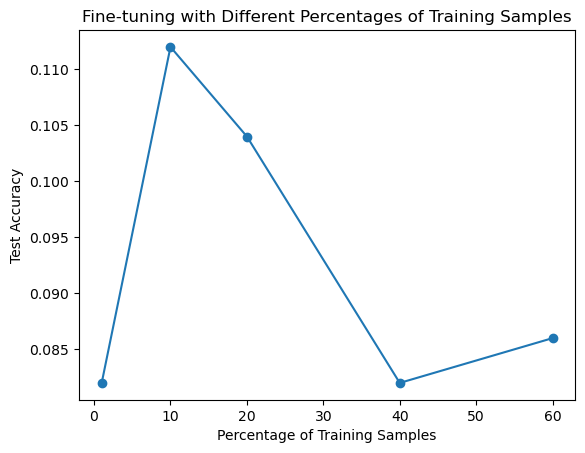

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Set the number of classes
num_classes = 32

# Set the number of hidden layers
hidden_layers_3 = [512, 256, 128]

# Set the desired percentages of training samples
percentages = [1, 10, 20, 40, 60]

# Initialize a list to store the test accuracies
test_accuracies = []

# Convert the test labels to one-hot vectors
y_test_onehot = to_categorical(y_test, num_classes)

# Loop through the percentages
for percentage in percentages:
    # Select the corresponding number of samples based on the percentage
    num_samples = int(len(flattened_train) * percentage / 100)
    selected_train_features = flattened_train[:num_samples]
    selected_train_labels = y_train_onehot[:num_samples]

    # Create and compile the model
    model = Sequential()
    model.add(Flatten(input_shape=(np.prod(input_shape),)))
    for units in hidden_layers_3:
        model.add(Dense(units, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(selected_train_features, selected_train_labels, epochs=10, batch_size=32, validation_data=(flattened_val, y_val_onehot))

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(flattened_test, y_test_onehot)

    # Store the test accuracy
    test_accuracies.append(test_accuracy)

# Plot the test accuracies
plt.plot(percentages, test_accuracies, marker='o')
plt.xlabel('Percentage of Training Samples')
plt.ylabel('Test Accuracy')
plt.title('Fine-tuning with Different Percentages of Training Samples')
plt.show()


In [ ]:
#Prepare confusion matrix and AUC-ROC curve to evaluate the model performance 

Epoch 1/10
125/125 [==============================] - 37s 281ms/step - loss: 3.4622 - accuracy: 0.1003 - val_loss: 2.5252 - val_accuracy: 0.0798
Epoch 2/10
125/125 [==============================] - 35s 277ms/step - loss: 2.3930 - accuracy: 0.0950 - val_loss: 2.3671 - val_accuracy: 0.1257
Epoch 3/10
125/125 [==============================] - 36s 286ms/step - loss: 2.3465 - accuracy: 0.1025 - val_loss: 2.3939 - val_accuracy: 0.0878
Epoch 4/10
125/125 [==============================] - 34s 274ms/step - loss: 2.3292 - accuracy: 0.1000 - val_loss: 2.3243 - val_accuracy: 0.0798
Epoch 5/10
125/125 [==============================] - 39s 310ms/step - loss: 2.3199 - accuracy: 0.1010 - val_loss: 2.3034 - val_accuracy: 0.1238
Epoch 6/10
125/125 [==============================] - 38s 305ms/step - loss: 2.3116 - accuracy: 0.0945 - val_loss: 2.3180 - val_accuracy: 0.0798
Epoch 7/10
125/125 [==============================] - 35s 277ms/step - loss: 2.3109 - accuracy: 0.0895 - val_loss: 2.3181 - val_ac

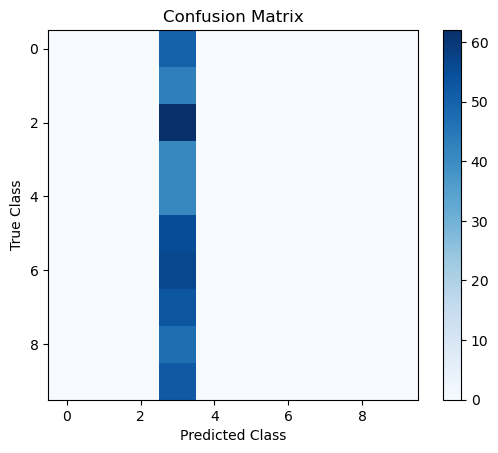

Confusion Matrix:
[[ 0  0  0 50  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  0  0]
 [ 0  0  0 62  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  0  0]
 [ 0  0  0 47  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  0  0]]


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Set the number of classes
num_classes = 32

# Set the number of hidden layers
hidden_layers_3 = [512, 256, 128]

# Flatten the encoded features
flattened_train = encoded_train.reshape(encoded_train.shape[0], -1)
flattened_val = encoded_val.reshape(encoded_val.shape[0], -1)
flattened_test = encoded_test.reshape(encoded_test.shape[0], -1)

# Convert the target labels to one-hot vectors
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)

# MLP model with 3 hidden layers
model = Sequential()
model.add(Flatten(input_shape=(np.prod(input_shape),)))
for units in hidden_layers_3:
    model.add(Dense(units, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(flattened_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(flattened_val, y_val_onehot))

# Evaluate the model on the test set
y_test_predicted = model.predict(flattened_test)
y_test_predicted_classes = np.argmax(y_test_predicted, axis=1)

# Prepare the confusion matrix
confusion_mat = confusion_matrix(y_test, y_test_predicted_classes)

# Plot the confusion matrix
plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_mat)


In [82]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

In [79]:
# Predict probabilities on the test set
y_test_prob = model.predict(flattened_test)

16/16 [==============================] - 1s 28ms/step


In [83]:
# Binarize the test labels
y_test_bin = label_binarize(y_test, classes=range(num_classes))

In [84]:
# Compute micro-average ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_test_prob.ravel())
roc_auc = auc(fpr, tpr)

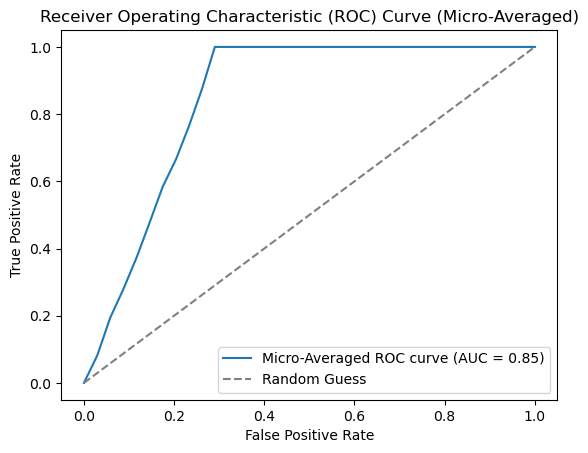

In [85]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='Micro-Averaged ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Micro-Averaged)')
plt.legend()
plt.show()

In [ ]:
#Implement a different architecture than the architecture described in Task.2.3.(a-b), that improves the result

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Set the number of classes
num_classes = 32

# Set the number of hidden layers
hidden_layers_3 = [512, 256, 128]
hidden_layers_5 = [512, 256, 128, 64, 32]

# Flatten the encoded features
flattened_train = encoded_train.reshape(encoded_train.shape[0], -1)
flattened_val = encoded_val.reshape(encoded_val.shape[0], -1)
flattened_test = encoded_test.reshape(encoded_test.shape[0], -1)

# Convert the target labels to one-hot vectors
y_train_onehot = to_categorical(y_train, num_classes)
y_val_onehot = to_categorical(y_val, num_classes)

# MLP model with 3 hidden layers
model_3 = Sequential()
model_3.add(Flatten(input_shape=(np.prod(input_shape),)))
for units in hidden_layers_3:
    model_3.add(Dense(units, activation='relu'))
model_3.add(Dense(num_classes, activation='softmax'))

# MLP model with 5 hidden layers
model_5 = Sequential()
model_5.add(Flatten(input_shape=(np.prod(input_shape),)))
for units in hidden_layers_5:
    model_5.add(Dense(units, activation='relu'))
model_5.add(Dense(num_classes, activation='softmax'))

# Compile the models
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the models
history_3 = model_3.fit(flattened_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(flattened_val, y_val_onehot))
history_5 = model_5.fit(flattened_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(flattened_val, y_val_onehot))

# Evaluate the models on the test set
_, test_accuracy_3 = model_3.evaluate(flattened_test, y_test_onehot)
_, test_accuracy_5 = model_5.evaluate(flattened_test, y_test_onehot)

# Print the test accuracies
print("Test Accuracy (3 Hidden Layers): {:.2f}%".format(test_accuracy_3 * 100))
print("Test Accuracy (5 Hidden Layers): {:.2f}%".format(test_accuracy_5 * 100))

# Choose the best model based on the test accuracy
best_model = model_3 if test_accuracy_3 > test_accuracy_5 else model_5

# Further fine-tune the best model with 100% training samples if necessary
best_model.fit(flattened_train, y_train_onehot, epochs=10, batch_size=32, validation_data=(flattened_val, y_val_onehot))

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(flattened_test, y_test_onehot)

# Print the final test accuracy
print("Final Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Epoch 1/10
125/125 [==============================] - 38s 280ms/step - loss: 3.3503 - accuracy: 0.1018 - val_loss: 2.4203 - val_accuracy: 0.0798
Epoch 2/10
125/125 [==============================] - 35s 277ms/step - loss: 2.4591 - accuracy: 0.1015 - val_loss: 2.4350 - val_accuracy: 0.0938
Epoch 3/10
125/125 [==============================] - 34s 274ms/step - loss: 2.3632 - accuracy: 0.1043 - val_loss: 2.3295 - val_accuracy: 0.0938
Epoch 4/10
125/125 [==============================] - 33s 268ms/step - loss: 2.3347 - accuracy: 0.0955 - val_loss: 2.3094 - val_accuracy: 0.1238
Epoch 5/10
125/125 [==============================] - 34s 271ms/step - loss: 2.3250 - accuracy: 0.0953 - val_loss: 2.3024 - val_accuracy: 0.1238
Epoch 6/10
125/125 [==============================] - 33s 268ms/step - loss: 2.3202 - accuracy: 0.0980 - val_loss: 2.3142 - val_accuracy: 0.1238
Epoch 7/10
125/125 [==============================] - 35s 278ms/step - loss: 2.3189 - accuracy: 0.1013 - val_loss: 2.3062 - val_ac